In [56]:
name = 'ANB2'
session = '20231208_d21'
num_trials = 173
threshold_shift = -0.03

In [57]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import pickle
import glob # find files in a directory
import re # regex for string parsing

from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.set_matplotlib_settings import set_matplotlib_settings
from common.set_matplotlib_settings import set_matplotlib_multiplot_settings2
from hit_movements.get_movement_thresholds import get_movement_thresholds
from common.select_trials import load_custom_hit_trials
from common.load_tonedisc_matfile import load_tonedisc_matfile
from common.analyze_time_series import average_time_series
from time_aligned_movements.get_aligned_movements import get_second_threshold_aligned_movements, get_tone_aligned_movements

In [58]:
set_matplotlib_multiplot_settings2()

tone_discriminiation_matfile = '../Data_Copy/ToneDiscrimination/'+name+'/ToneDisc_'+name+'_'+session+'.mat'
params, response, respMTX, MTXTrialType = load_tonedisc_matfile(tone_discriminiation_matfile)
movement_baseline, movement_threshold, no_movement_threshold = get_movement_thresholds(params, respMTX, threshold_shift)

PreprocessLeverData_folder = "../Data_Copy/AnalysisData/"+name+"/PreprocessLeverData_"+name+"_"+session+"/"
HitMovements_folder = "../Data_Copy/AnalysisData/"+name+"/HitMovements_"+name+"_"+session+"/"
Jerk_folder = "../Data_Copy/AnalysisData/"+name+"/Jerk_"+name+"_"+session+"/"
output_folder = "../Data_Copy/AnalysisData/"+name+"/ToneMovements_"+name+"_"+session+"/"
!mkdir {output_folder}

respMTX shape: (173, 7)
MTXTrialType shape: (1000, 5)
number of trials: 173
movement_baseline for all trials should be the same:  2.775913978494624
mvt threshold:  0.15959462964071258 + movement_baseline =  2.9355086081353368
nomvt threshold:  0.09974664352544539 + movement_baseline =  2.8756606220200696


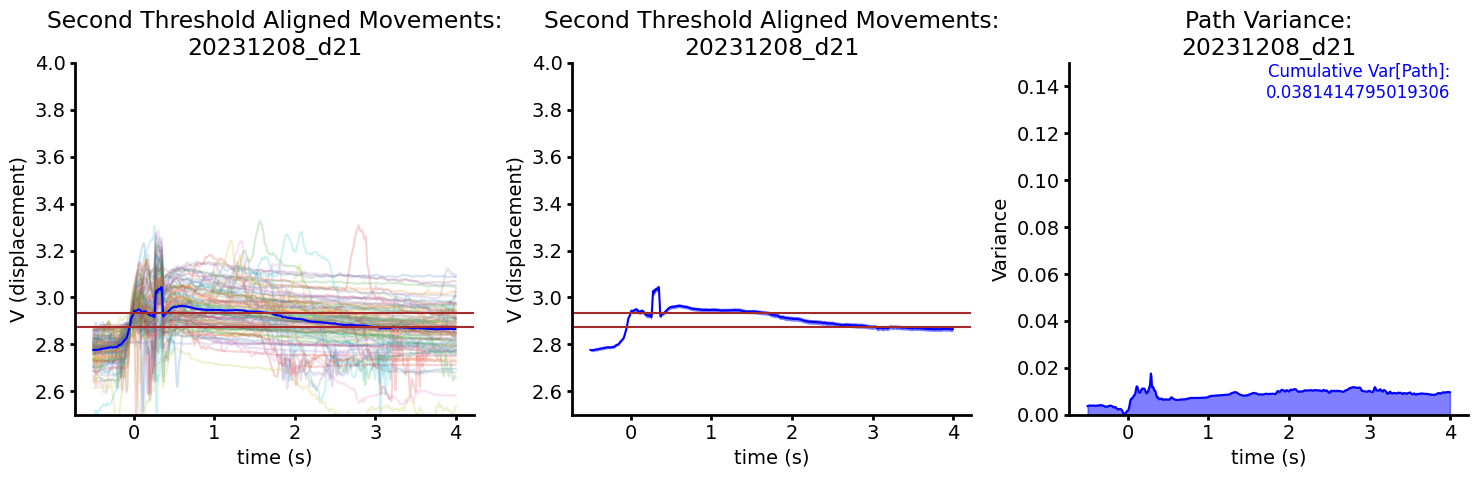

In [60]:
before_duration = 0.5
after_duration = 4.0
second_threshold_aligned_movements = get_second_threshold_aligned_movements(before_duration, after_duration, PreprocessLeverData_folder, HitMovements_folder)

plt.subplot(1,3,1)
for second_threshold_aligned_movement in second_threshold_aligned_movements:
    plt.plot(second_threshold_aligned_movement[1], second_threshold_aligned_movement[0], alpha=0.2)
average_data, common_time, std_data, sem_data, var_data = average_time_series(second_threshold_aligned_movements)
plt.plot(common_time, average_data, color='blue')
plt.axhline(y=movement_baseline + no_movement_threshold, label='thresholds', color='brown')
plt.axhline(y=movement_baseline + movement_threshold, color='brown')
plt.xlabel("time (s)")
plt.ylabel("V (displacement)")
plt.ylim([2.5, 4])
plt.title("Second Threshold Aligned Movements:\n"+session)

plt.subplot(1,3,2)
plt.plot(common_time, average_data, color='blue')
plt.fill_between(common_time, average_data+sem_data, average_data-sem_data, color='blue', alpha=0.5, label='Standard Error', zorder=2, linewidth=0.0)
plt.axhline(y=movement_baseline + no_movement_threshold, label='thresholds', color='brown')
plt.axhline(y=movement_baseline + movement_threshold, color='brown')
plt.ylim([2.5, 4])
plt.xlabel("time (s)")
plt.ylabel("V (displacement)")
plt.title("Second Threshold Aligned Movements:\n"+session)

plt.subplot(1,3,3)
path_variance_dx = np.median(np.diff(common_time))
cumulative_path_variance = np.trapz(var_data, dx=path_variance_dx)
plt.fill_between(common_time, 0, var_data, color='blue', alpha=0.5)
plt.plot(common_time, var_data, color='blue')
plt.ylim([0, 0.15])
plt.xlabel("time (s)")
plt.ylabel("Variance")
plt.title("Path Variance:\n"+session)
plt.text(4, 0.15, "Cumulative Var[Path]:\n"+ str(cumulative_path_variance), ha='right', va='top', fontsize=12, color='blue')
plt.show()